## Generate a structural connectome using eigenmodes

This tutorial will demonstrate how to generate a structural connectivity matrix $G$ using the formula from [Normand *et al.* (2025)](https://www.biorxiv.org/content/10.1101/2025.09.17.676944v5):

$$
\displaystyle G_{ij}=\sum_{m=1}^k \frac{\psi_m(i)\psi_m^+(j)}{1+r_s^2\lambda_m}
$$

where:
- $G_{ij}$ denotes the connectivity strength between cortical vertices $i$ and $j$
- $\psi_m(i)$ denotes the amplitude of the $m^{th}$ geometric eigenmode at vertex $i$
- $\lambda_m$ denotes the $m^{th}$ eigenvalue
- $[\ \ ]^+$ denotes the Moore–Penrose pseudoinverse
- $r_s$ denotes the spatial length scale (a free parameter)
- $k$ denotes the number of modes used (a free parameter)

As in the previous tutorial, we begin by initialising the EigenSolver with a cortical surface and then solving for the eigenmodes and eigenvalues.

In [1]:
from importlib.resources import files
import nibabel as nib
from matplotlib.colors import LinearSegmentedColormap
from nsbtools.eigen import EigenSolver
from nsbtools.connectome import generate_connectome
from nsbtools.utils import unmask
from nsbtools.plotting import plot_surf, plot_heatmap

cmap = LinearSegmentedColormap.from_list('frank', ["#000000","#03e2ff", "#ffffff"])

In [2]:
# Load cortical surface and medial wall mask
data_dir = files('nsbtools.data')
lh_surf = data_dir / 'sp-human_tpl-fsLR_den-4k_hemi-L_midthickness.surf.gii'
medmask = nib.load(data_dir / 'sp-human_tpl-fsLR_den-4k_hemi-L_medmask.label.gii').darrays[0].data.astype(bool)

# Initialize solver with surface
solver = EigenSolver(lh_surf, mask=medmask, n_modes=200)
solver.solve()

The eigenmodes and eigenvalues can then be passed into the `generate_connectome` function from the `connectome` module:

In [3]:
G = generate_connectome(solver.emodes, solver.evals)

Note that $r_s=9.53$ and $k=108$ are used by default, in line with the paper.

We can visualise the structural connectivity matrix using `plot_heatmap`, from the `plotting` module:

<Axes: >

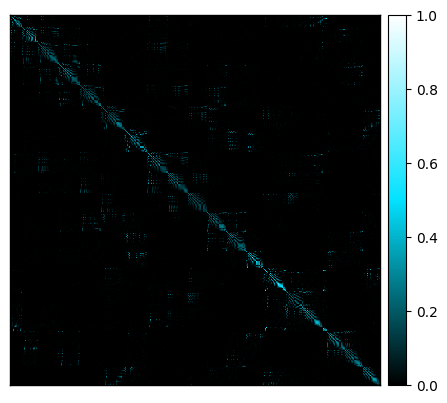

In [4]:
plot_heatmap(G, cmap=cmap, cbar=True)

We can also visualise the vertex-averaged connectivity on the cortical surface, this time using `plot_brain`:

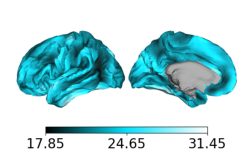

In [5]:
nodal_sc = G.sum(axis=0)

plot_surf(
    lh_surf,
    unmask(nodal_sc, medmask),
    cmap=cmap,
    cbar=True
)

To explore the model further, we can generate another connectome but only use 5 modes instead of the default 108:

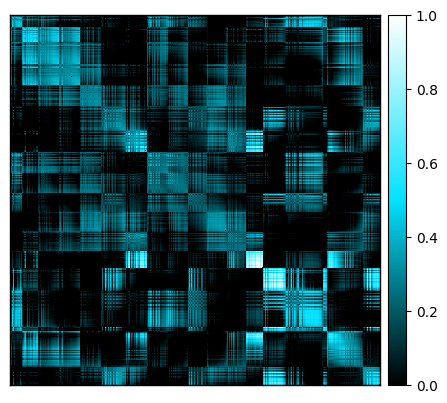

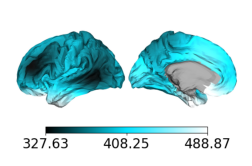

In [6]:
G_k5 = generate_connectome(solver.emodes, solver.evals, k=5)

plot_heatmap(G_k5, cmap=cmap, cbar=True)

plot_surf(
    lh_surf,
    unmask(G_k5.sum(axis=0), medmask),
    cmap=cmap,
    cbar=True
)

What about if we instead increase the spatial length scale parameter from 9.53 to 100?

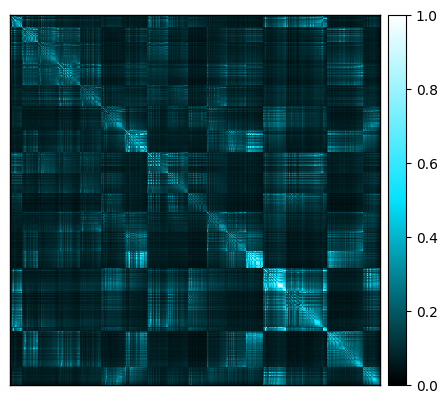

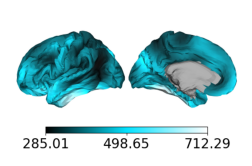

In [7]:
G_r100 = generate_connectome(solver.emodes, solver.evals, r=100)

plot_heatmap(G_r100, cmap=cmap, cbar=True)

plot_surf(
    lh_surf,
    unmask(G_r100.sum(axis=0), medmask),
    cmap=cmap,
    cbar=True
)